In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import MDAnalysis as mda
# import re
import json
# import readline
from termcolor import cprint
# import os, sys, getopt
# import warnings

In [2]:
!pwd

/Users/shea/dcuments/research/dph-rotation


In [3]:
filename = 'pbc_whole'
u = mda.Universe(filename+'.gro')

In [4]:
u.load_new('pbc_whole.xtc')
len(u.trajectory)

2211

In [5]:
dph_atoms = u.select_atoms("resid 9326 and not name H*")
len(dph_atoms)

18

In [6]:
dph_traj = sp.zeros((len(u.trajectory),len(dph_atoms),3))

In [7]:
# for i, ts in enumerate(u.trajectory):
#     for j, n in enumerate(dph_atoms):
#         dph_traj[i, j] = u.atoms(dph_atoms.position
# dph_traj = dph_atoms.positions
for i, ts in enumerate(u.trajectory):
    dph_traj[i] = dph_atoms.positions

In [8]:
sp.save('dph-traj',dph_traj)

19


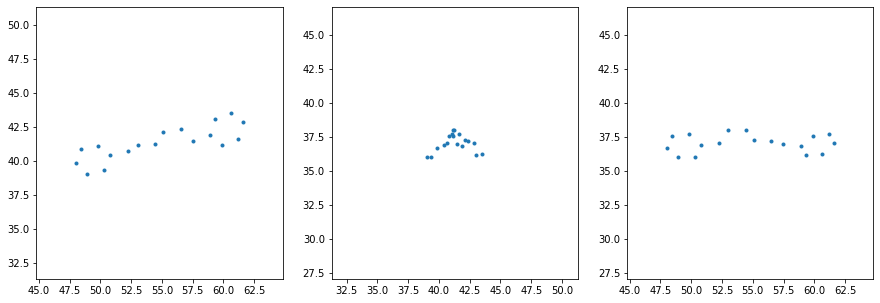

In [8]:
# for i in range(20):
i = 19
print(i)
tstep = i*100
center = sp.mean(dph_traj[tstep,:,:],axis=0)

plt.figure(figsize = (15,5))
plt.subplot(131)
plt.plot(dph_traj[tstep,:,0],dph_traj[tstep,:,1],'.')
plt.xlim(center[0]-10,center[0]+10)
plt.ylim(center[1]-10,center[1]+10)

plt.subplot(132)
plt.plot(dph_traj[tstep,:,1],dph_traj[tstep,:,2],'.')
plt.xlim(center[1]-10,center[1]+10)
plt.ylim(center[2]-10,center[2]+10)

plt.subplot(133)
plt.plot(dph_traj[tstep,:,0],dph_traj[tstep,:,2],'.')
plt.xlim(center[0]-10,center[0]+10)
plt.ylim(center[2]-10,center[2]+10)
plt.show()

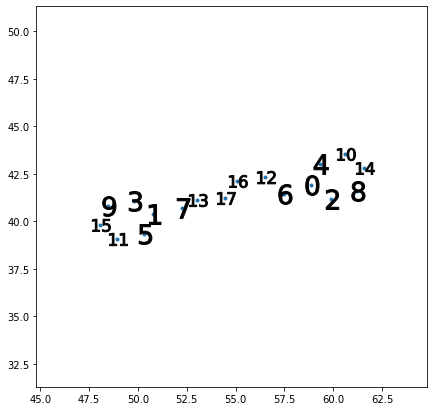

In [9]:
tstep = 1900
center = sp.mean(dph_traj[tstep,:,:],axis=0)


plt.figure(figsize = (7,7))
plt.plot(dph_traj[tstep,:,0],dph_traj[tstep,:,1],'.')
plt.xlim(center[0]-10,center[0]+10)
plt.ylim(center[1]-10,center[1]+10)

for i in range(18):
    plt.plot(dph_traj[tstep,i,0],dph_traj[tstep,i,1],marker="$"+str(i)+"$", markersize=20, c=[0,0,0])

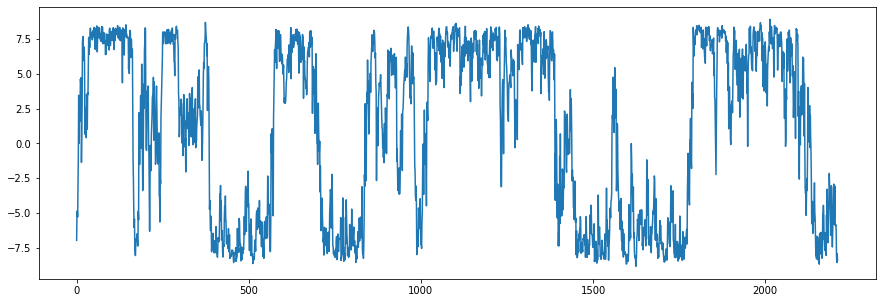

In [10]:
plt.figure(figsize=(15,5))
plt.plot(dph_traj[:,0,2]-dph_traj[:,1,2])

In [11]:
twomean = sp.mean((dph_traj[:,0,2]-dph_traj[:,1,2],
                   dph_traj[:,6,2]-dph_traj[:,7,2]),axis = 0)
threemean = sp.mean((dph_traj[:,0,2]-dph_traj[:,1,2],
                     dph_traj[:,6,2]-dph_traj[:,7,2],
                     dph_traj[:,14,2]-dph_traj[:,15,2]),axis = 0)

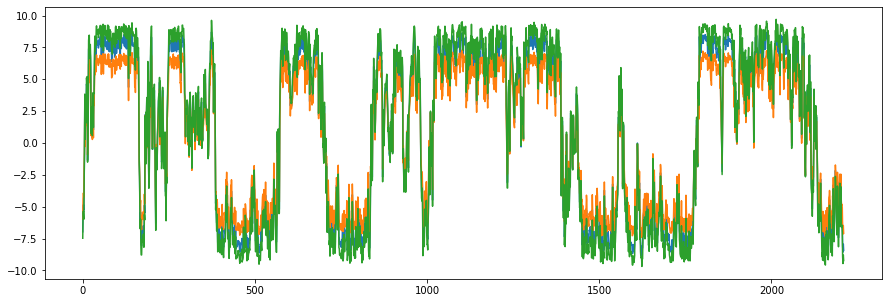

In [12]:
plt.figure(figsize=(15,5))

plt.plot(dph_traj[:,0,2]-dph_traj[:,1,2])
plt.plot(twomean)
plt.plot(threemean)

In [13]:
def normalize(vector):
    return sp.array(vector/sp.linalg.norm(vector,axis = 0))

In [14]:
vector1 = sp.array([normalize(dph_traj[i, 0]-dph_traj[i, 1]) for i in range(len(dph_traj))])
vector2 = sp.array([normalize(dph_traj[i, 6]-dph_traj[i, 7]) for i in range(len(dph_traj))])
vector3 = sp.array([normalize(dph_traj[i,14]-dph_traj[i,15]) for i in range(len(dph_traj))])
print(vector1)

[[-0.47218265 -0.14843418 -0.8689136 ]
 [-0.78828254 -0.0846671  -0.60946052]
 [-0.75411736  0.31042886 -0.57874081]
 ...
 [-0.06168108 -0.00643122 -0.99807519]
 [-0.07547397 -0.34667561 -0.93494369]
 [ 0.00662924  0.13765244 -0.99045841]]


In [15]:
# plt.plot(vector1[:,2])
# plt.plot(vector2[:,2])
# plt.plot(vector3[:,2])
zcomp = sp.mean((vector1,vector2,vector3),axis=0)[:,2]

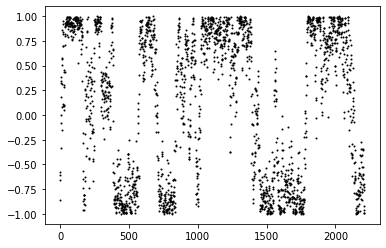

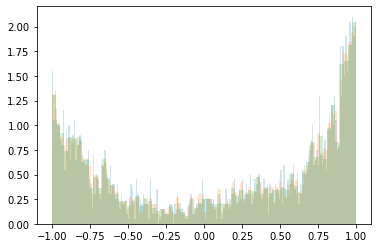

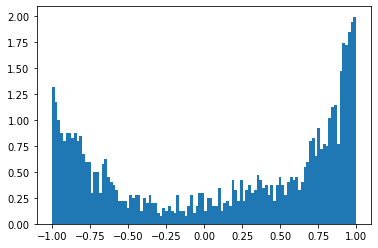

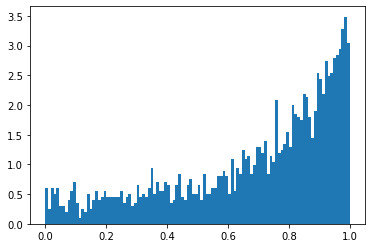

In [16]:
plt.plot(zcomp,'.k',markersize=2)
plt.show()
for b in [len(zcomp)//10,
          len(zcomp)//20,
          len(zcomp)//30]:
    plt.hist(zcomp,bins=b,density=True,alpha=0.2)
# plt.ylim(0,0.5)
plt.show()

plt.hist(zcomp,bins=len(zcomp)//20,density=True)
plt.show()

plt.hist(sp.absolute(zcomp),bins=len(zcomp)//20,density=True)
plt.show()

[ 1.37088906  1.52032324 -1.19466756 -0.07475444  0.34485402  0.22352916]
1.005351332766195


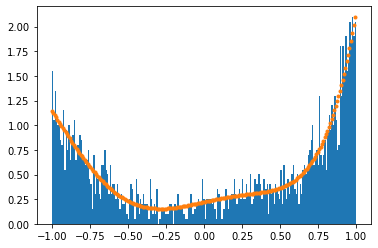

In [17]:
pdfhist = plt.hist(zcomp,bins=len(zcomp)//10,density=True)
xvals = sp.arange(-1,1,2/len(pdfhist[0]))

degree = 5
polycoeffs = sp.polyfit(xvals,pdfhist[0],degree)
print(polycoeffs)

integral = 0
for i in range(degree//2+1):
    integral += 2/(2*i+1)*polycoeffs[-(2*i+1)]
print(integral)
pdfpoly = sp.poly1d(polycoeffs)/integral
plt.plot(xvals,pdfpoly(xvals),'.')

73 73
[ 8.16478787 -9.46501152  5.13538304 -0.8023509   0.44394725]
1.0212708392014478


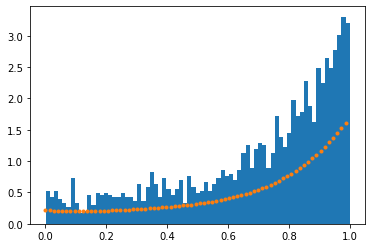

In [18]:
pdfhist = plt.hist(sp.absolute(zcomp),bins=len(zcomp)//30,density=True)
xvals = sp.arange(0,1,1/len(pdfhist[0]))

degree = 4
print(len(xvals),len(pdfhist[0]))
polycoeffs = sp.polyfit(xvals,pdfhist[0],degree)
print(polycoeffs)

integral = 0
for i in range(degree+1):
    integral += polycoeffs[-i-1]/(i+1)
print(integral)
pdfpoly = sp.poly1d(polycoeffs)/integral/2
plt.plot(xvals,pdfpoly(xvals),'.')

In [19]:
print(sp.special.legendre(2))
print(sp.special.legendre(2)(-0.574))

     2
1.5 x - 0.5
-0.00578600000000018


In [20]:
# from scipy import signal as sg

In [42]:
p2_arr = sp.array([sp.special.legendre(2)(costheta) for costheta in zcomp])
p4_arr = sp.array([sp.special.legendre(4)(costheta) for costheta in zcomp])

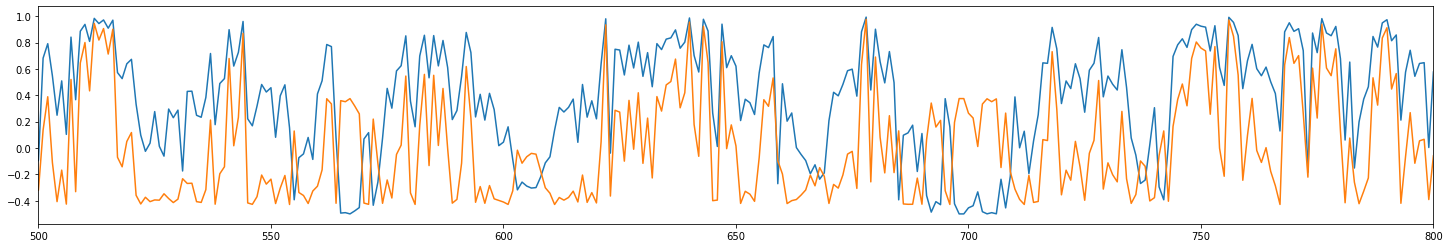

In [43]:
plt.figure(figsize = (25,4))
plt.plot(p2_arr,'-')
plt.plot(p4_arr,'-')
plt.xlim(500,800)
plt.show()

In [59]:
print(f'S_2 = {sp.mean(p2_arr)**2:5.4f}')
print(f'S_4 = {sp.mean(p4_arr)**2:5.4f}')

S_2 = 0.1045
S_4 = 0.0054


In [56]:
parray = [sp.mean(sp.array([sp.special.legendre(i)(costheta) for costheta in zcomp]))**2 for i in range(12)]

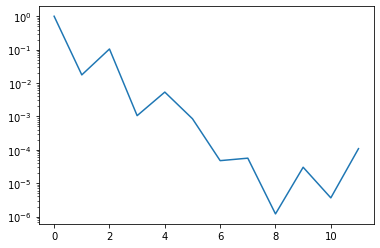

In [57]:
plt.plot(parray)
plt.yscale('log')